# Exploring the MovieLens 1M Dataset Samuel Steiner

#### Extrated (and slightly modified) from *Python for Data Analysis (Wes McKinney)*

This dataset contains 1 million ratings collected from 6000 users on 4000 movies, and it is organized into three tables:


*   Ratings
*   Users
*   Movie information

Each table is available as a separate file, each containing a series of rows where columns are separated by *::*


[Download the dataset here](http://files.grouplens.org/datasets/movielens/ml-1m.zip)

This example illustrates a series of interesting things that we can learn from this dataset. Most operations will be performed using the pandas library. For more details, please refer to *Python for Data Analysis - page 26*.

## **Code**

Let's begin by importing pandas. It is conventional to use *pd* to denote pandas

In [1]:
import pandas as pd

Next we will import each of the three tables and assign names to each of the columns:

In [2]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('./ml-1m/users.dat', sep='::', header=None, names=unames, engine='python')
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('./ml-1m/ratings.dat', sep='::', header=None, names=rnames, engine='python')
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('./ml-1m/movies.dat', sep='::', header=None, names=mnames, engine='python', encoding='latin-1')


Let's take a look at the first 5 rows of each table:

In [3]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [4]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [5]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


Having all information spread across different tables makes it much more dificult to analyse the data. Using pandas's merge function, we first merge ratings with users then we merge that result with the movies data. pandas infers which columns to
use as the merge (or join) keys based on overlapping names:

In [6]:
data = pd.merge(pd.merge(ratings, users), movies)

Below is the first row in that dataset

In [7]:
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In this form, aggregating the ratings grouped by one or more user or movie characteristics is straightforward once you build some familiarity with pandas. To get mean movie ratings for each film grouped by gender, we can use the pivot_table method:


In [8]:
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')

In [9]:
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


If we wish to only look at movies that received more than a certain number of ratings, we can group them as follows (here using 250 ratings):

In [10]:
ratings_by_title = data.groupby('title').size()

In [11]:
ratings_by_title[:5]

title
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199
dtype: int64

Let's now grab the titles of movies that were rated more than 250 times:

In [12]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]

In [13]:
active_titles[:5]

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)',
       '12 Angry Men (1957)'],
      dtype='object', name='title')

The index of titles receiving at least 250 ratings can then be used to select rows from mean_ratings above:


In [14]:
mean_ratings = mean_ratings.loc[active_titles]

In [15]:
mean_ratings[:5]

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421


To see the top films among female viewers, we can sort by the F column in descending order:

In [16]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)

In [17]:
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


Likewise, for males:

In [18]:
top_male_ratings = mean_ratings.sort_values(by='M', ascending=False)

In [19]:
top_male_ratings[:10]

gender,F,M
title,,
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Schindler's List (1993),4.562602,4.491415
"Wrong Trousers, The (1993)",4.588235,4.478261
"Close Shave, A (1995)",4.644444,4.473795


Suppose you wanted to find the movies that are most divisive between male and female viewers. One way is to add a column to *mean_ratings* containing the difference in means, then sort by that:

In [20]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

Sorting by 'diff' gives us the movies with the greatest rating difference and which were preferred by women:

In [21]:
sorted_by_diff = mean_ratings.sort_values(by='diff')

In [22]:
sorted_by_diff[:10]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


Reversing the order of the rows and again slicing off the top 10 rows, we get the movies preferred by men that women didn’t rate highly:


In [23]:
sorted_by_diff[::-1][:10]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


# (1) [10 pts] An aggregate on the number of rating done for each particular genre, e.g., (Action, Adventure, Drama, Science Fiction, ...)

In [24]:
import numpy as np
# split the genres up so they are actually seperate not a single string.
data['genres'] = data['genres'].apply(lambda x: x.split('|'))
# Flatten the data so they are a single list of the genres 
a = pd.Series(np.concatenate(data.genres))
a.shape

(2101815,)

In [25]:
df = a.groupby(a).size().rename_axis('genres').reset_index(name='count')
df

,genres,count
0,Action,257457
1,Adventure,133953
2,Animation,43293
3,Children's,72186
4,Comedy,356580
5,Crime,79541
6,Documentary,7910
7,Drama,354529
8,Fantasy,36301
9,Film-Noir,18261


# (2) [5 pts] The top 5 ranked genres by women on most number of rating

In [26]:
genre_woman = data[['genres','gender']]
genre_woman = genre_woman[genre_woman.gender == 'F']
genre_woman.reset_index(inplace=True)
genre_woman.head()

,index,genres,gender
0,0,[Drama],F
1,5,[Drama],F
2,7,[Drama],F
3,8,[Drama],F
4,19,[Drama],F


In [27]:
genre_f = pd.Series(np.concatenate(genre_woman.genres))
genre_f.shape

(505937,)

In [28]:
df_f = genre_f.groupby(genre_f).size().rename_axis('genres').reset_index(name='count')
df_f.sort_values(by='count', ascending=False)[0:5]

,genres,count
7,Drama,98153
4,Comedy,96271
13,Romance,50297
0,Action,45650
15,Thriller,40308


# (3) [5 pts] The top 5 ranked genres by men on most number of rating.

In [29]:
genre_man = data[['genres','gender']]
genre_man = genre_man[genre_man.gender == 'M']
genre_man.reset_index(inplace=True)
genre_man.head()

,index,genres,gender
0,1,[Drama],M
1,2,[Drama],M
2,3,[Drama],M
3,4,[Drama],M
4,6,[Drama],M


In [30]:
genre_m = pd.Series(np.concatenate(genre_man.genres))
genre_m.shape

(1595878,)

In [31]:
df_m = genre_m.groupby(genre_m).size().rename_axis('genres').reset_index(name='count')
df_m.sort_values(by='count', ascending=False)[0:5]

,genres,count
4,Comedy,260309
7,Drama,256376
0,Action,211807
15,Thriller,149372
14,Sci-Fi,129894


# (4) [30 pts] Pick a genre of your choice and provide average movie’s ratings by the following four time intervals during which the movies were released (a) 1970 to 1979 (b) 1980 to 1989 (c) 1990 to 1999 (d) 2000 to 2009. Also, if you observed any issues with data in any of these ranges, please mention it.

The genere I'm chosing is Thriller

In [32]:
import re
data_thriller = data[['Thriller' in x for x in data['genres']]]
thriller_mean_ratings = data_thriller.pivot_table('rating', index='title', aggfunc='mean')
thriller_mean_ratings['year'] = [int(re.search(r'\(\d+\)', i)[0][1:-1]) for i in thriller_mean_ratings.index]
print(f'Total thriller movies {thriller_mean_ratings.shape[0]}')
thriller_mean_ratings.head()


Total thriller movies 485


,rating,year
title,,
...And Justice for All (1979),3.713568,1979
"13th Warrior, The (1999)",3.158667,1999
2001: A Space Odyssey (1968),4.068765,1968
"39 Steps, The (1935)",4.075099,1935
52 Pick-Up (1986),3.300000,1986


In [33]:
def thrillers_between(lower: int, upper:int):
    thriller_mean_ratings_a = thriller_mean_ratings[thriller_mean_ratings['year'].between(lower, upper)]
    print(f'\n \n Number of thriller movies from {lower} to {upper}: {thriller_mean_ratings_a.shape[0]}')
    print(thriller_mean_ratings_a.head())

In [34]:
year_ranges = [(1970, 1979),(1980, 1989),(1990, 1999),(2000, 2009)]
for year_range in year_ranges:
    thrillers_between(year_range[0], year_range[1])


 
 Number of thriller movies from 1970 to 1979: 21
                                 rating  year
title                                        
...And Justice for All (1979)  3.713568  1979
Alien (1979)                   4.159585  1979
Assault on Precinct 13 (1976)  3.571429  1976
Boys from Brazil, The (1978)   3.661765  1978
Chinatown (1974)               4.339241  1974

 
 Number of thriller movies from 1980 to 1989: 54
                      rating  year
title                             
52 Pick-Up (1986)   3.300000  1986
Abyss, The (1989)   3.683965  1989
Akira (1988)        3.933628  1988
Aliens (1986)       4.125824  1986
Angel Heart (1987)  3.404018  1987

 
 Number of thriller movies from 1990 to 1999: 317
                            rating  year
title                                   
13th Warrior, The (1999)  3.158667  1999
8MM (1999)                2.863971  1999
Absolute Power (1997)     3.357895  1997
Air Force One (1997)      3.588290  1997
Albino Alligator (1996)   2.85

# (5) 30 pts] A function that given a genre and a rating_range (i.e. [3.5, 4]), returns all the movies of that genre and within that rating range sorted by average rating. Using an example, demonstrate that your function works.

In [35]:
def genre_average_rating(genre: str, rating_range: list[float], ascending: bool=True):
    """Returns the movies from a genre with an average rating between the specified range.

    Args:
        genre (str): the genre
        rating_range (list[float]): a rating range which should be a list of integers size 2 with the first value being lower and the second value being higer
    """
    # input checking
    if len(rating_range) != 2:
        print('Please make sure you only include a lower and upper rating_range')
        return
    elif rating_range[0] < 1:
        # the readme for the data says the ratings are bouned by whole star system which means the lowest score is 1 star
        print('your lower limit must be greater than or equal to 1')
        return
    elif rating_range[0] > 5:
        print('your lower limit must be lower than or equal to 5')
        return
    elif rating_range[1] > 5:
        print('your upper limit must be lower than or equal to 5')
        return
    elif rating_range[0] > rating_range[1]:
        print('Make sure you putt the lower limit first in the list')
        return

    # seperate data to the specified genre
    data_genre_specific = data[[genre in x for x in data['genres']]]
    

    if data_genre_specific.shape[0] < 1:
        print('You selected a genre that doesn\'t exist!')
        return

    # aggregate the data and then select between the given range
    gs_mean_ratings = data_thriller.pivot_table('rating', index='title', aggfunc='mean')
    gs_mean_ratings = gs_mean_ratings[gs_mean_ratings['rating'].between(rating_range[0], rating_range[1])]

    return gs_mean_ratings.sort_values(by='rating', ascending=ascending)


In [36]:
genre_average_rating('Thriller', [3.8, 3.85])

,rating
title,
Born American (1986),3.800000
I Can't Sleep (J'ai pas sommeil) (1994),3.800000
Rosemary's Baby (1968),3.818820
Saboteur (1942),3.820225
Dark City (1998),3.822654
Bound (1996),3.823427
In the Line of Fire (1993),3.825103
"Man Who Knew Too Much, The (1934)",3.835938


# (6) [20 pts] Present one other statistic, figure, aggregate, or plot that you created using this dataset, along with a short description of what interesting observations you derived from it. This question is meant to give you a freehand to explore and present aspects of the dataset that interests you!

In [37]:
def genre_specifc_mean_ratings_year(genre: str):
    data_gs = data[[genre in x for x in data['genres']]]
    gs_mean_ratings = data_gs.pivot_table('rating', index='title', aggfunc='mean')
    gs_mean_ratings['year'] = [int(re.search(r'\(\d+\)', i)[0][1:-1]) for i in gs_mean_ratings.index]  
    gs_mean_ratings['genre'] = genre
    return gs_mean_ratings.sort_values(by='year').reset_index()[['rating', 'year', 'genre']]

In [38]:
genres = ['Comedy', 'Drama', 'Horror', 'Sci-Fi']
genre_year_avg_rating = pd.concat([genre_specifc_mean_ratings_year(genre) for genre in genres])
genre_df =genre_year_avg_rating.groupby(['year', 'genre']).mean().reset_index()
genre_df['genre'] = genre_df['genre'].astype('category')

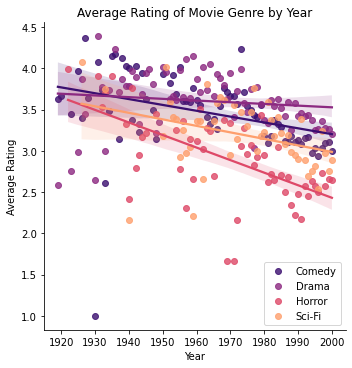

In [39]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.lmplot(data= genre_df, x='year', y='rating', hue='genre', legend=False, palette='magma')

plt.title("Average Rating of Movie Genre by Year")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.legend(loc='lower right')
plt.show()

I was interested in seeing if there was an overarching trend in the average rating of movies over time. It was advantageous to breakdown the data by genre. I selected four genres (Comedy, Drama, Horror, Sci-Fi) to compare but this can be done with any amount. Four genres were chosen to keep clarity within the graphic, these specific genres were chosen arbitrarily. What was interesting is that all genres had a trend down over time. The spread of the data doesn't allow for a completely accurate trend line but this trend still appeared. Furthermore, this is descriptive of the data but does not explain why the trend is there. Exploring the data further may lead to understanding of the trend, if I was to intuit some explanations I would guess that there is something to do with the number of reviews over time. I would predict that as the number of reviews goes up the average rating will go down as it trends towards a 'common' rating. 